# Introducrtion to Machine Learning: Assignment #1
## Submission date: 31\1\2024, 23:59.
### Topics:
- Linear regression
- Gaussian Bayes
- Naïve bayes
- KNN

Submitted by:

Or Dinar 207035809

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


## Question 1 - Linear regression

You will implement simple linear regression alone! <br/> The dataset consists of few 1-feature samples $\{(x_i,y_i )\}_{i=1}^∞$ where $y_i$ is the prediction of the $x_i$ sample. <br/>
We will only try to fit the given data, <u>without validation or test</u>.<br/>
We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.


import libarires

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>Assume the data is already zero-centered

In [ ]:
def Linreg_sol(X, y):
    product = X.T @ X
    productInv = np.linalg.inv(product)
    
    w = productInv @ X.T @ y
    return w[0][0]

first visualization

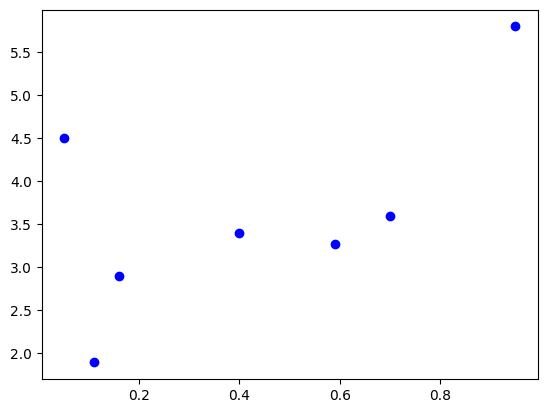

In [3]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

Split the data to X,y.<br/>
Since the data is non-zero centered, center it to mean zero (since we discussed only y=wx). Then, run the solution.

In [ ]:
# X is an array of all Xi
# y is an array of all yi
# both are from dimensions nxd, where d=1
X = (data[:,0]).reshape((len(data[:,0]), 1))    # reshape the array to nx1
y = (data[:,1]).reshape((len(data[:,1]), 1))    # reshape the array to nx1

#calculate mean array, mean[0]= mean of X, mean[1] = mean of y
mean = np.array([np.mean(X),np.mean(y)])

#center data
X = X - mean[0]
y = y - mean[1]

w = Linreg_sol(X, y)

# Restore the original line. if y'=wx' (after removing bias) than y-u_y = w(x-u_x), isolate y.
print(f'The linear line is y={w:.2f}*(x-{mean[0]:.2f})+{mean[1]:.2f}')

Plot the line solution <br/>
Does the line really fits the data? <br/>
<font color='red'>Write here your answer and explain why</font>

In [ ]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

As we learned, try scaling using standardization, repeat the above process.<br/>DON'T use sklearn

In [ ]:
mean = # Implement here
std = # Implement here
w = # Implement here

# Restore the original line. if y'=wx' (after standardization) than (y-u_y)/std_y = w(x-u_x)/std_x, isolate y.
print(f'The linear line is y=({w:.2f}*((x-{mean[0]:.2f})/{std[0]:.2f})*{std[1]:.2f}+{mean[1]:.2f})')

Plot the line solution <br/>
Is the result better? <br/>
Hint: compare both lines obtained. Why do you think this happened? <br/>
<font color='red'>Write here your answer and explain why</font>


In [ ]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

We Say that a point as outlier if it is located further than one standard deviation above or below the best-fit line. <br/>
Find and print the outliers from the (original) dataset


In [ ]:
# Implement here and print the point that is outlier.

Run the linear regression again, but remove the outliers <br/>
Is the result better? <br/>
<font color='red'>Write here your answer and explain</font>

In [ ]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
# remove outliers from data

w = # Implement here

x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

## Question 2 - Gaussian bayes


You are given data of wine bottles and want to learn the type of wine which it belongs to. The dataset consists of 13 continuous features and 3 classes of wine. <br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.

import libarires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv

In [ ]:
# Implement here

print(df.shape)
df.head(5)

Check if there is even potential for gaussian assumption to work here, by plotting the density of the features, using plotting for data frames. <br/>
Will gaussian bayes work here or not? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(18, 15), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 25. <br/>Note that the data frame currently includes the labels as well.

In [ ]:
# Implement here

Implement the functions below. <br/>Both get test point x and return the predicted class, but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [ ]:
def classify_point_gaussian_bayes(x):
  # Implement here

def classify_point_gaussian_naive_bayes(x):
  # Implement here

Look at the test accuracies for both methods. Explain the differences origin. <br/>
Hint: Use correlation matrix visualization for data frames.  
<font color='red'>Write here your answer and explain it</font>

<br/> Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

In [ ]:
res = []
for idx, test_point in enumerate(x_test):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(x_test):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Now, scale the data using StandardScaler.<br/>
Make sure that you are scaling the test according to the training (as learned in class)


In [ ]:
# Implement here

Look at the test accuracies now. What can you conclude about the effect  of scaling? Is it good/bad? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
res = []
for idx, test_point in enumerate(x_test_scaled):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(x_test_scaled):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the tutorials.

In [ ]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

## Question 3 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict if a tweet is about cyberbullying or not. <br/>
We will have to classify sentences into 5 categories, <b>but could be any number.</b><br/>
The categories are {"not bullying", "gender", "age", "religion", "ethnicity"}.


import libarires

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [ ]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)
  # Implement here
  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
def learn_NB_text():
  # Implement here
	return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [ ]:
def ClassifyNB_text(Pw, P):
	# Implement here

Read the files

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [ ]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

## Question 4 - KNN

You want to detect types into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [11]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv')
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [8]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, or the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
corr_mat = df.corr()
print(corr_mat)

Split the data to 80% train and 20% test, with random state 21. <br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [ ]:
X = df.drop('Type', axis=1)         # Feature matrix
y = df['Type']                      # Output vector     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Implement the functions 'Euclidian', 'Manhattan'. <br/>
Those functions get train and test datasets and return distance metric, sized mxn (where m is the number of samples in test and n is the number of samples in train).<br/>
Reminder: Manhattan distance is $d(x,y)=\sum_{i=1}^d |x_i-y_i|$, d is the features number.


In [ ]:
def Euclidean(test, data):
  # Implement here

def Manhattan(test, data):
  # Implement here

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [ ]:
def kNN_classify(data, labels, test, k, metric='Euclidian'):
  arguments = (test, data)
  distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric.
  # Implement here

Look at the plots for different k values and compare those metrics.

In [ ]:
metrics = ['Euclidean', 'Manhattan']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accs.append()   # Implement here

  axs[idx // 2, idx % 2].plot(ks, accs, color='red')
  axs[idx // 2, idx % 2].set_xlabel('k')
  axs[idx // 2, idx % 2].set_ylabel('accuracy')
  axs[idx // 2, idx % 2].set_title(metric)
  axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()

The Mahalanobis distance metric is already implemented to you. <br/>Run the following code and answer: Which gives better accuracy?<br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  c = kNN_classify(X_train, y_train, X_test, k, 'Mahalanobis')
  accs.append()   # Implement here

axs[1, 0].plot(ks, accs, color='red')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('accuracy')
axs[1, 0].set_title('Mahalanobis')
axs[1, 0].set_xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We want to use advanced distance metric: <br/>
$$d_{\text{hybrid}}=d_{\text{mahalanobis}}+0.5*d_{\text{cosine}}$$
Implement the function 'Hybrid', which returns the distance metric, as defined above.


In [ ]:
def Cosine(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))

  # Calculate the Cosine distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = 1 - np.sum(test[i] * data[j]) / (np.linalg.norm(test[i]) * np.linalg.norm(data[j]))
  return distances

def Hybrid(test, data):
  # Implement here, 1-3 lines

Look at the plot. Does it perform better than the previous metrics?

In [ ]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  c = kNN_classify(X_train, y_train, X_test, k, 'Hybrid')
  accs.append()   # Implement here

axs[1, 1].plot(ks, accs, color='red')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('accuracy')
axs[1, 1].set_title('Hybrid')
axs[1, 1].set_xticks(ks)
plt.show()

You forgot to use scaling! Based on the feature densities (as done in Q3), determine which scaler should we use and perform it.

In [ ]:
# Peform scaling

Look at the plots. Did it help the accuracies? Try to justify the change in the hybrid metric.  
<font color='red'>Write here your answer and explain it</font>

In [ ]:
metrics = ['Euclidean', 'Manhattan', 'Mahalanobis', 'Hybrid']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train_scaled, y_train, X_test_scaled, k, metric)
    accs.append()   # Implement here

  axs[idx // 2, idx % 2].plot(ks, accs, color='red')
  axs[idx // 2, idx % 2].set_xlabel('k')
  axs[idx // 2, idx % 2].set_ylabel('accuracy')
  axs[idx // 2, idx % 2].set_title(metric)
  axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()